In [1]:
import pandas as pd
import numpy as np
import time
from collections import defaultdict
import os
import matplotlib.pyplot as plt

In [2]:
def read_files(filename):
    data = pd.read_csv(filename)
    return data

In [3]:
directory = "../Data/Cleaned_Data/"

In [4]:
data_nyumc = read_files(directory+"nyumc.csv")
data_nyumc.head()

,Unnamed: 0,flu,fever,sorethroat,cough,muscle,headache,fatigue,vomit,nausea,diarrhea,male,age 0-4,age 5-15,age 16-44,age 45-64,age 65+,female
0,3,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
1,4,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
2,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1


In [5]:
data_gv = read_files(directory+"goviral.csv")
data_gv.head()

,Unnamed: 0,virus,age,fever,cough,runnynose,sorethroat,muscle,fatigue,chills,...,nausea,diarrhea,vomit,male,female,age 0-4,age 5-15,age 16-44,age 45-64,age 65+
0,0,1,33.0,0,0,0,1,1,1,1,...,0,1,0,1.0,0.0,0,0,1,0,0
1,1,1,33.0,0,0,0,1,1,1,1,...,0,1,0,1.0,0.0,0,0,1,0,0
2,2,1,30.0,1,1,1,0,1,1,1,...,0,0,0,0.0,1.0,0,0,1,0,0
3,3,1,30.0,1,1,1,0,1,1,1,...,0,0,0,0.0,1.0,0,0,1,0,0
4,4,1,33.0,0,1,1,0,1,1,1,...,0,0,0,1.0,0.0,0,0,1,0,0


In [6]:
data_fw = read_files(directory+"fluwatch.csv")
data_fw.head()

,Unnamed: 0,fever,cough,sorethroat,runnynose,blockednose,sneeze,diarrhea,muscle,headache,flu,age 0-4,age 45-64,age 16-44,age 5-15,age 65+,male,female
0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [7]:
data_hk = read_files(directory+"hongkong.csv")
data_hk.head()

,Unnamed: 0,headache,sorethroat,cough,muscle,runnynose,phlegm,male,flu,fever,age 5-15,age 16-44,age 0-4,age 65+,age 45-64,gender,female
0,0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [8]:
data_ht = read_files(directory+"hutterite.csv")
data_ht.head()

,RID,virus,chills,cough,fatigue,fever,headache,muscle,runnynose,blockednose,sorethroat,female,male,age 45-64,age 16-44,age 5-15,age 65+,age 0-4,earache
0,1,0.0,0,0,0,0,1,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0,1,0,0,1,1,1,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0,0,0,0,1,0,1,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,0.0,0,1,0,0,0,0,1,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,0.0,0,1,0,0,0,0,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Symptoms and target variables for all the datasets

In [9]:
DATASETS = [data_nyumc,data_gv,data_fw,data_hk,data_ht]
DATASET_NAMES = ['NYUMC','GoViral','FluWatch','HongKong','Hutterite']
symptoms = defaultdict()
target_variable = defaultdict()

In [10]:
def get_columns(dataframe):
    columns = list(dataframe.columns)
    return columns

In [11]:
def print_columns(dataset):
    print("The features in this dataset are :\n",get_columns(dataset))
    print("_________________________________________________________")

In [12]:
#for NYUMC:
print_columns(data_nyumc)
symptoms['NYUMC'] = [
                     'fever',
                     'sorethroat',
                     'cough',
                     'muscle',
                     'headache',
                     'fatigue',
                     'vomit',
                     'nausea',
                     'diarrhea']
target_variable['NYUMC'] = 'flu'

The features in this dataset are :
 ['Unnamed: 0', 'flu', 'fever', 'sorethroat', 'cough', 'muscle', 'headache', 'fatigue', 'vomit', 'nausea', 'diarrhea', 'male', 'age 0-4', 'age 5-15', 'age 16-44', 'age 45-64', 'age 65+', 'female']
_________________________________________________________


In [13]:
#for GoViral
print_columns(data_gv)
symptoms['GoViral'] = [
                       'fever',
                       'cough',
                       'runnynose',
                       'sorethroat',
                       'muscle',
                       'fatigue',
                       'chills',
                       'shortness of breath',
                       'leg pain',
                       'nausea',
                       'diarrhea',
                       'vomit']
target_variable['GoViral'] = 'virus'

The features in this dataset are :
 ['Unnamed: 0', 'virus', 'age', 'fever', 'cough', 'runnynose', 'sorethroat', 'muscle', 'fatigue', 'chills', 'shortness of breath', 'leg pain', 'nausea', 'diarrhea', 'vomit', 'male', 'female', 'age 0-4', 'age 5-15', 'age 16-44', 'age 45-64', 'age 65+']
_________________________________________________________


In [14]:
#for FluWatch
print_columns(data_fw)
symptoms['FluWatch'] = ['fever',
                        'cough',
                        'sorethroat',
                        'runnynose',
                        'blockednose',
                        'sneeze',
                        'diarrhea',
                        'muscle',
                        'headache',
                        ]
target_variable['FluWatch'] = 'flu'

The features in this dataset are :
 ['Unnamed: 0', 'fever', 'cough', 'sorethroat', 'runnynose', 'blockednose', 'sneeze', 'diarrhea', 'muscle', 'headache', 'flu', 'age 0-4', 'age 45-64', 'age 16-44', 'age 5-15', 'age 65+', 'male', 'female']
_________________________________________________________


In [15]:
#for HongKong
print_columns(data_hk)
symptoms['HongKong'] = ['headache',
                        'sorethroat',
                        'cough',
                        'muscle',
                        'runnynose',
                        'phlegm',
                        'fever']
target_variable['HongKong'] = 'flu'

The features in this dataset are :
 ['Unnamed: 0', 'headache', 'sorethroat', 'cough', 'muscle', 'runnynose', 'phlegm', 'male', 'flu', 'fever', 'age 5-15', 'age 16-44', 'age 0-4', 'age 65+', 'age 45-64', 'gender', 'female']
_________________________________________________________


In [16]:
#for hutterite
print_columns(data_ht)
symptoms['Hutterite'] = [
                         'chills',
                         'cough',
                         'fatigue',
                         'fever',
                         'headache',
                         'muscle',
                         'runnynose',
                         'blockednose',
                         'sorethroat',
                         'earache']
target_variable['Hutterite'] = 'virus'

The features in this dataset are :
 ['RID', 'virus', 'chills', 'cough', 'fatigue', 'fever', 'headache', 'muscle', 'runnynose', 'blockednose', 'sorethroat', 'female', 'male', 'age 45-64', 'age 16-44', 'age 5-15', 'age 65+', 'age 0-4', 'earache']
_________________________________________________________


### Age demographics

In [17]:
AGE_DEMOGRAPHICS = ['age 0-4','age 5-15','age 16-44','age 45-64','age 65+']

age1 = 'age 0-4'<br\> age2 = 'age 5-15'<br\>age3 = 'age 16-44'<br\> age4 = 'age 45-64'<br\>age5 = 'age 65+'<br\>

In [18]:
def age_distribution_across_features(dataset,symptoms,target):
    age_1 = defaultdict()
    age_2 = defaultdict()
    age_3 = defaultdict()
    age_4 = defaultdict()
    age_5 = defaultdict()
    
    age_positive_1 = defaultdict()
    age_positive_2 = defaultdict()
    age_positive_3 = defaultdict()
    age_positive_4 = defaultdict()
    age_positive_5 = defaultdict()
    
    for i in symptoms:
        
        #general
        age_1_feature = dataset.loc[(dataset[i] == 1) & (dataset['age 0-4'] == 1)]
        age_1[i] = age_1_feature.shape[0]
        
        age_2_feature = dataset.loc[(dataset[i] == 1) & (dataset['age 5-15'] == 1)]
        age_2[i] = age_2_feature.shape[0]
        
        age_3_feature = dataset.loc[(dataset[i] == 1) & (dataset['age 16-44'] == 1)]
        age_3[i] = age_3_feature.shape[0]
        
        age_4_feature = dataset.loc[(dataset[i] == 1) & (dataset['age 45-64'] == 1)]
        age_4[i] = age_4_feature.shape[0]
        
        age_5_feature = dataset.loc[(dataset[i] == 1) & (dataset['age 65+'] == 1)]
        age_5[i] = age_5_feature.shape[0]
        
        #positive_cases
        age_positive_1_feature = dataset.loc[(dataset[i] == 1) & (dataset['age 0-4'] == 1) & (dataset[target] == 1)]
        age_positive_1[i] = age_positive_1_feature.shape[0]
        
        age_positive_2_feature = dataset.loc[(dataset[i] == 1) & (dataset['age 5-15'] == 1) & (dataset[target] == 1)]
        age_positive_2[i] = age_positive_2_feature.shape[0]
        
        age_positive_3_feature = dataset.loc[(dataset[i] == 1) & (dataset['age 16-44'] == 1) & (dataset[target] == 1)]
        age_positive_3[i] = age_positive_3_feature.shape[0]
        
        age_positive_4_feature = dataset.loc[(dataset[i] == 1) & (dataset['age 45-64'] == 1) & (dataset[target] == 1)]
        age_positive_4[i] = age_positive_4_feature.shape[0]
        
        age_positive_5_feature = dataset.loc[(dataset[i] == 1) & (dataset['age 65+'] == 1) & (dataset[target] == 1)]
        age_positive_5[i] = age_positive_5_feature.shape[0]
        
       
    return age_1,age_2,age_3,age_4,age_5,age_positive_1,age_positive_2,age_positive_3,age_positive_4,age_positive_5
        

### Plot the age distribution

In [19]:
def plot_age_across_features(age_1,age_2,age_3,age_4,age_5,
                             age_positive_1,age_positive_2,age_positive_3,age_positive_4,age_positive_5,
                             labels,
                             title):
    plt.figure(figsize=(16,8))
    
    ind = np.array([x for x,_ in enumerate(labels)])
    width = 0.6
    opacity = 0.2
    
    #negative age 65+
    plt.bar(ind,
            age_5 - age_positive_5,
            width,
            alpha = opacity,
            label = 'Negative Age 65+',
            color = 'c',
            bottom = age_1 + age_2 + age_3 + age_4 + age_positive_5)
    
    
    #positive age 65+
    plt.bar(ind,
            age_positive_5,
            width,
            alpha = 0.8,
            label = 'Positive Age 65+',
            color = 'c',
            bottom = age_1 + age_2 + age_3 + age_4)
    
    
    #negative age 45-65
    plt.bar(ind,
            age_4 - age_positive_4,
            width,
            alpha = opacity,
            label = 'Negative Age 45-65',
            color = 'y',
            bottom = age_1 + age_2 + age_3 + age_positive_4)
    
    #positive age 45-65
    plt.bar(ind,
            age_positive_4,
            width,
            alpha = 0.8,
            label = 'Positive Age 45-65',
            color = 'y',
            bottom = age_1 + age_2 + age_3)
    
    #negative age 16-44
    plt.bar(ind,
            age_3 - age_positive_3,
            width,
            alpha = opacity,
            label = 'Negative Age 16-44',
            color = 'g',
            bottom = age_1 + age_2 + age_positive_3)
    
    
    #positive age 16-44
    plt.bar(ind,
            age_positive_3,
            width,
            alpha = 0.8,
            label = 'Positive Age 16-44',
            color = 'g',
            bottom = age_1 + age_2)
    
    
    
    #negative age 5-15
    plt.bar(ind,
            age_2 - age_positive_2,
            width,
            alpha = opacity,
            label = 'Negative Age 5-15',
            color = 'r',
            bottom = age_1 + age_positive_2)
    
    #positive age 5-15
    plt.bar(ind,
            age_positive_2,
            width,
            alpha = 0.8,
            label = 'Positive Age 5-15',
            color = 'r',
            bottom = age_1)
    
    #negative age 0-4
    plt.bar(ind,
            age_1 - age_positive_1,
            width,
            alpha = opacity,
            label = 'Negative Age 0-4',
            color = 'b',
            bottom = age_positive_1)
    
    #positive age 0-4
    plt.bar(ind,
            age_positive_1,
            width,
            alpha = 0.8,
            label = 'Positive Age 0-4',
            color = 'b')
    
    plt.xticks(ind,labels)
    plt.ylabel('Number of individuals')
    plt.xlabel('Features')
    plt.legend(loc="upper right")
    plt.title(title)
    plt.show()

### Age demographics for NYUMC

In [20]:
age_1_nyumc,age_2_nyumc,age_3_nyumc,age_4_nyumc,age_5_nyumc,age_positive_1_nyumc,age_positive_2_nyumc,age_positive_3_nyumc,age_positive_4_nyumc,age_positive_5_nyumc = age_distribution_across_features(data_nyumc,symptoms['NYUMC'],target_variable['NYUMC'])

In [21]:
print("Age 0-4 :\n")
for k,v in age_1_nyumc.items():
    print(k,v)
print("_________________________________________________________")
print("Age 5-15 :\n")
for k,v in age_2_nyumc.items():
    print(k,v)
print("_________________________________________________________")
print("Age 16-44 :\n")
for k,v in age_3_nyumc.items():
    print(k,v)
print("_________________________________________________________")
print("Age 45-64 :\n")
for k,v in age_4_nyumc.items():
    print(k,v)
print("_________________________________________________________")
print("Age 65+ :\n")
for k,v in age_5_nyumc.items():
    print(k,v)
print("_________________________________________________________")

Age 0-4 :

sorethroat 39
fever 3901
headache 0
diarrhea 59
cough 1308
fatigue 2
vomit 275
muscle 1
nausea 7
_________________________________________________________
Age 5-15 :

sorethroat 171
fever 1500
headache 6
diarrhea 25
cough 586
fatigue 1
vomit 133
muscle 11
nausea 14
_________________________________________________________
Age 16-44 :

sorethroat 1182
fever 4921
headache 18
diarrhea 191
cough 2134
fatigue 19
vomit 296
muscle 214
nausea 177
_________________________________________________________
Age 45-64 :

sorethroat 274
fever 2658
headache 6
diarrhea 69
cough 1334
fatigue 20
vomit 109
muscle 71
nausea 90
_________________________________________________________
Age 65+ :

sorethroat 99
fever 2482
headache 6
diarrhea 69
cough 1268
fatigue 16
vomit 76
muscle 28
nausea 65
_________________________________________________________


In [22]:
print("Age 0-4 :\n")
for k,v in age_positive_1_nyumc.items():
    print(k,v)
print("_________________________________________________________")
print("Age 5-15 :\n")
for k,v in age_positive_2_nyumc.items():
    print(k,v)
print("_________________________________________________________")
print("Age 16-44 :\n")
for k,v in age_positive_3_nyumc.items():
    print(k,v)
print("_________________________________________________________")
print("Age 45-64 :\n")
for k,v in age_positive_4_nyumc.items():
    print(k,v)
print("_________________________________________________________")
print("Age 65+ :\n")
for k,v in age_positive_5_nyumc.items():
    print(k,v)
print("_________________________________________________________")

Age 0-4 :

sorethroat 0
fever 88
headache 0
diarrhea 0
cough 20
fatigue 0
vomit 2
muscle 0
nausea 0
_________________________________________________________
Age 5-15 :

sorethroat 0
fever 55
headache 0
diarrhea 0
cough 16
fatigue 0
vomit 6
muscle 0
nausea 1
_________________________________________________________
Age 16-44 :

sorethroat 10
fever 175
headache 0
diarrhea 2
cough 95
fatigue 0
vomit 13
muscle 8
nausea 5
_________________________________________________________
Age 45-64 :

sorethroat 6
fever 74
headache 1
diarrhea 2
cough 41
fatigue 0
vomit 1
muscle 7
nausea 5
_________________________________________________________
Age 65+ :

sorethroat 1
fever 67
headache 0
diarrhea 0
cough 53
fatigue 0
vomit 0
muscle 0
nausea 2
_________________________________________________________


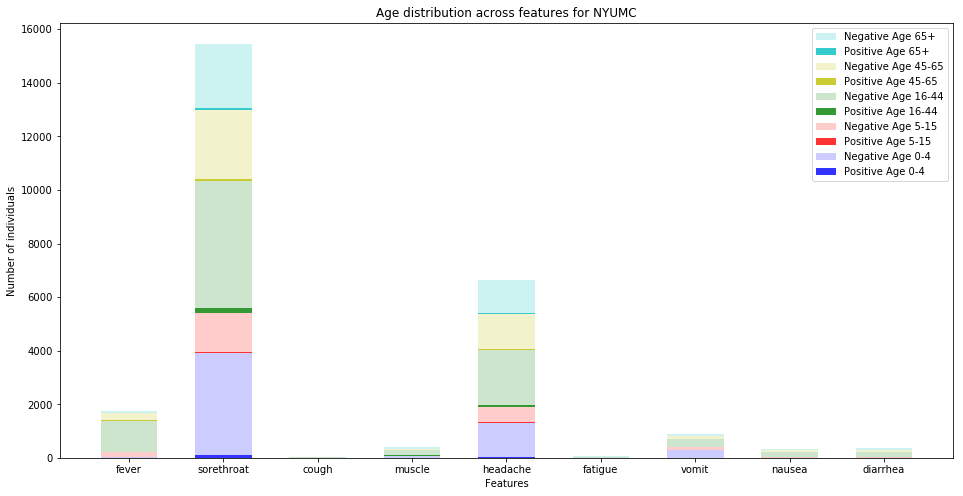

In [23]:
#plot the graph
plot_age_across_features(np.asarray(list(age_1_nyumc.values()),dtype=int),
                         np.asarray(list(age_2_nyumc.values()),dtype=int),
                         np.asarray(list(age_3_nyumc.values()),dtype=int),
                         np.asarray(list(age_4_nyumc.values()),dtype=int),
                         np.asarray(list(age_5_nyumc.values()),dtype=int),
                         np.asarray(list(age_positive_1_nyumc.values()),dtype=int),
                         np.asarray(list(age_positive_2_nyumc.values()),dtype=int),
                         np.asarray(list(age_positive_3_nyumc.values()),dtype=int),
                         np.asarray(list(age_positive_4_nyumc.values()),dtype=int),
                         np.asarray(list(age_positive_5_nyumc.values()),dtype=int),
                         symptoms['NYUMC'],
                         "Age distribution across features for NYUMC")

### Age demographics for GoViral

In [24]:
age_1_gv,age_2_gv,age_3_gv,age_4_gv,age_5_gv,age_positive_1_gv,age_positive_2_gv,age_positive_3_gv,age_positive_4_gv,age_positive_5_gv = age_distribution_across_features(data_gv,symptoms['GoViral'],target_variable['GoViral'])

In [25]:
print("Age 0-4 :\n")
for k,v in age_1_gv.items():
    print(k,v)
print("_________________________________________________________")
print("Age 5-15 :\n")
for k,v in age_2_gv.items():
    print(k,v)
print("_________________________________________________________")
print("Age 16-44 :\n")
for k,v in age_3_gv.items():
    print(k,v)
print("_________________________________________________________")
print("Age 45-64 :\n")
for k,v in age_4_gv.items():
    print(k,v)
print("_________________________________________________________")
print("Age 65+ :\n")
for k,v in age_5_gv.items():
    print(k,v)
print("_________________________________________________________")

Age 0-4 :

sorethroat 4
muscle 2
runnynose 4
shortness of breath 0
vomit 0
chills 2
diarrhea 1
fever 2
fatigue 4
cough 4
leg pain 1
nausea 1
_________________________________________________________
Age 5-15 :

sorethroat 2
muscle 2
runnynose 2
shortness of breath 0
vomit 0
chills 1
diarrhea 1
fever 2
fatigue 2
cough 3
leg pain 1
nausea 1
_________________________________________________________
Age 16-44 :

sorethroat 197
muscle 112
runnynose 199
shortness of breath 19
vomit 12
chills 98
diarrhea 62
fever 89
fatigue 159
cough 183
leg pain 64
nausea 76
_________________________________________________________
Age 45-64 :

sorethroat 60
muscle 51
runnynose 67
shortness of breath 12
vomit 9
chills 42
diarrhea 30
fever 46
fatigue 60
cough 65
leg pain 32
nausea 36
_________________________________________________________
Age 65+ :

sorethroat 32
muscle 22
runnynose 38
shortness of breath 10
vomit 10
chills 23
diarrhea 19
fever 22
fatigue 29
cough 27
leg pain 13
nausea 15
__________________

In [26]:
print("Age 0-4 :\n")
for k,v in age_positive_1_gv.items():
    print(k,v)
print("_________________________________________________________")
print("Age 5-15 :\n")
for k,v in age_positive_2_gv.items():
    print(k,v)
print("_________________________________________________________")
print("Age 16-44 :\n")
for k,v in age_positive_3_gv.items():
    print(k,v)
print("_________________________________________________________")
print("Age 45-64 :\n")
for k,v in age_positive_4_gv.items():
    print(k,v)
print("_________________________________________________________")
print("Age 65+ :\n")
for k,v in age_positive_5_gv.items():
    print(k,v)
print("_________________________________________________________")

Age 0-4 :

sorethroat 4
muscle 2
runnynose 4
shortness of breath 0
vomit 0
chills 2
diarrhea 1
fever 2
fatigue 4
cough 4
leg pain 1
nausea 1
_________________________________________________________
Age 5-15 :

sorethroat 2
muscle 2
runnynose 2
shortness of breath 0
vomit 0
chills 1
diarrhea 1
fever 2
fatigue 2
cough 3
leg pain 1
nausea 1
_________________________________________________________
Age 16-44 :

sorethroat 122
muscle 70
runnynose 123
shortness of breath 9
vomit 8
chills 59
diarrhea 36
fever 56
fatigue 102
cough 114
leg pain 33
nausea 42
_________________________________________________________
Age 45-64 :

sorethroat 34
muscle 32
runnynose 38
shortness of breath 5
vomit 5
chills 25
diarrhea 15
fever 30
fatigue 35
cough 40
leg pain 19
nausea 21
_________________________________________________________
Age 65+ :

sorethroat 25
muscle 14
runnynose 28
shortness of breath 4
vomit 3
chills 15
diarrhea 11
fever 14
fatigue 20
cough 17
leg pain 7
nausea 8
__________________________

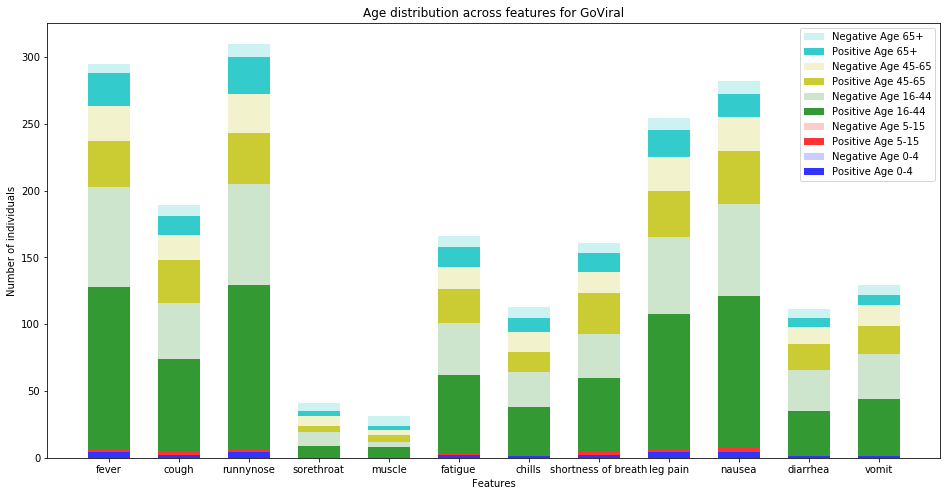

In [27]:
plot_age_across_features(np.asarray(list(age_1_gv.values()),dtype=int),
                         np.asarray(list(age_2_gv.values()),dtype=int),
                         np.asarray(list(age_3_gv.values()),dtype=int),
                         np.asarray(list(age_4_gv.values()),dtype=int),
                         np.asarray(list(age_5_gv.values()),dtype=int),
                         np.asarray(list(age_positive_1_gv.values()),dtype=int),
                         np.asarray(list(age_positive_2_gv.values()),dtype=int),
                         np.asarray(list(age_positive_3_gv.values()),dtype=int),
                         np.asarray(list(age_positive_4_gv.values()),dtype=int),
                         np.asarray(list(age_positive_5_gv.values()),dtype=int),
                         symptoms['GoViral'],
                         "Age distribution across features for GoViral")

### Age demographics for FluWatch

In [28]:
age_1_fw,age_2_fw,age_3_fw,age_4_fw,age_5_fw,age_positive_1_fw,age_positive_2_fw,age_positive_3_fw,age_positive_4_fw,age_positive_5_fw = age_distribution_across_features(data_fw,symptoms['FluWatch'],target_variable['FluWatch'])

In [29]:
print("Age 0-4 :\n")
for k,v in age_1_fw.items():
    print(k,v)
print("_________________________________________________________")
print("Age 5-15 :\n")
for k,v in age_2_fw.items():
    print(k,v)
print("_________________________________________________________")
print("Age 16-44 :\n")
for k,v in age_3_fw.items():
    print(k,v)
print("_________________________________________________________")
print("Age 45-64 :\n")
for k,v in age_4_fw.items():
    print(k,v)
print("_________________________________________________________")
print("Age 65+ :\n")
for k,v in age_5_fw.items():
    print(k,v)
print("_________________________________________________________")

Age 0-4 :

sorethroat 23
fever 7
runnynose 65
headache 40
sneeze 46
cough 57
blockednose 29
diarrhea 9
muscle 34
_________________________________________________________
Age 5-15 :

sorethroat 80
fever 43
runnynose 94
headache 64
sneeze 76
cough 90
blockednose 79
diarrhea 8
muscle 37
_________________________________________________________
Age 16-44 :

sorethroat 137
fever 76
runnynose 169
headache 122
sneeze 138
cough 148
blockednose 130
diarrhea 5
muscle 75
_________________________________________________________
Age 45-64 :

sorethroat 211
fever 113
runnynose 275
headache 168
sneeze 239
cough 259
blockednose 184
diarrhea 15
muscle 123
_________________________________________________________
Age 65+ :

sorethroat 60
fever 41
runnynose 77
headache 39
sneeze 82
cough 86
blockednose 55
diarrhea 8
muscle 40
_________________________________________________________


In [30]:
print("Age 0-4 :\n")
for k,v in age_positive_1_fw.items():
    print(k,v)
print("_________________________________________________________")
print("Age 5-15 :\n")
for k,v in age_positive_2_fw.items():
    print(k,v)
print("_________________________________________________________")
print("Age 16-44 :\n")
for k,v in age_positive_3_fw.items():
    print(k,v)
print("_________________________________________________________")
print("Age 45-64 :\n")
for k,v in age_positive_4_fw.items():
    print(k,v)
print("_________________________________________________________")
print("Age 65+ :\n")
for k,v in age_positive_5_fw.items():
    print(k,v)
print("_________________________________________________________")

Age 0-4 :

sorethroat 15
fever 5
runnynose 43
headache 27
sneeze 34
cough 37
blockednose 19
diarrhea 5
muscle 23
_________________________________________________________
Age 5-15 :

sorethroat 49
fever 30
runnynose 70
headache 37
sneeze 52
cough 57
blockednose 53
diarrhea 8
muscle 22
_________________________________________________________
Age 16-44 :

sorethroat 67
fever 31
runnynose 99
headache 61
sneeze 82
cough 79
blockednose 75
diarrhea 1
muscle 38
_________________________________________________________
Age 45-64 :

sorethroat 102
fever 59
runnynose 150
headache 86
sneeze 128
cough 127
blockednose 94
diarrhea 6
muscle 59
_________________________________________________________
Age 65+ :

sorethroat 32
fever 22
runnynose 41
headache 19
sneeze 44
cough 45
blockednose 33
diarrhea 7
muscle 18
_________________________________________________________


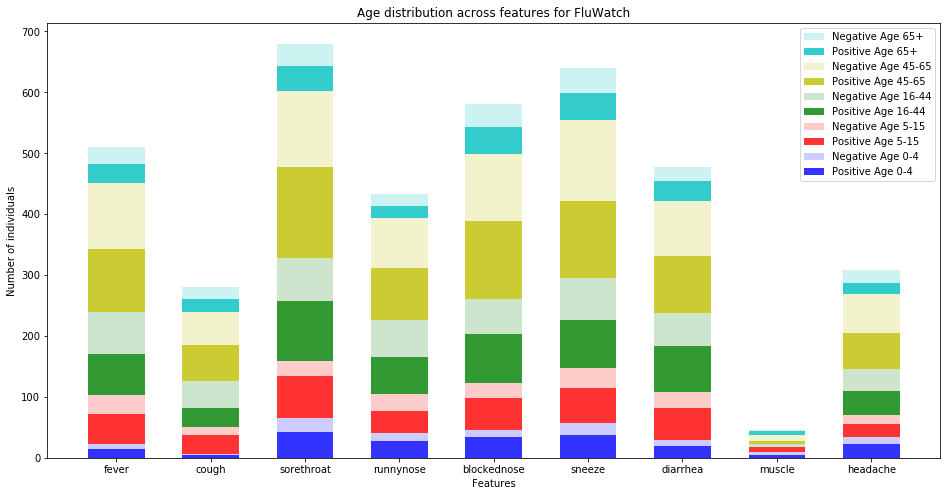

In [31]:
plot_age_across_features(np.asarray(list(age_1_fw.values()),dtype=int),
                         np.asarray(list(age_2_fw.values()),dtype=int),
                         np.asarray(list(age_3_fw.values()),dtype=int),
                         np.asarray(list(age_4_fw.values()),dtype=int),
                         np.asarray(list(age_5_fw.values()),dtype=int),
                         np.asarray(list(age_positive_1_fw.values()),dtype=int),
                         np.asarray(list(age_positive_2_fw.values()),dtype=int),
                         np.asarray(list(age_positive_3_fw.values()),dtype=int),
                         np.asarray(list(age_positive_4_fw.values()),dtype=int),
                         np.asarray(list(age_positive_5_fw.values()),dtype=int),
                         symptoms['FluWatch'],
                         "Age distribution across features for FluWatch")

### Age demographics for HongKong

In [32]:
age_1_hk,age_2_hk,age_3_hk,age_4_hk,age_5_hk,age_positive_1_hk,age_positive_2_hk,age_positive_3_hk,age_positive_4_hk,age_positive_5_hk = age_distribution_across_features(data_hk,symptoms['HongKong'],target_variable['HongKong'])

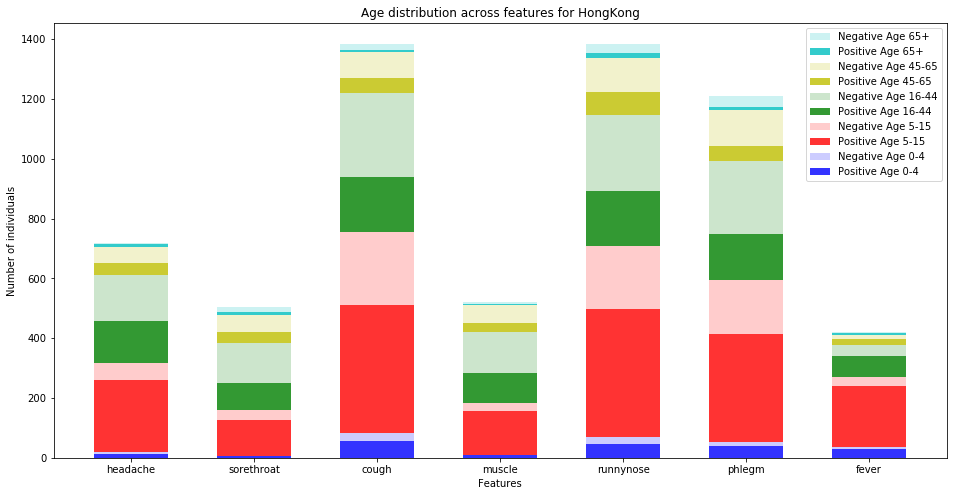

In [33]:
plot_age_across_features(np.asarray(list(age_1_hk.values()),dtype=int),
                         np.asarray(list(age_2_hk.values()),dtype=int),
                         np.asarray(list(age_3_hk.values()),dtype=int),
                         np.asarray(list(age_4_hk.values()),dtype=int),
                         np.asarray(list(age_5_hk.values()),dtype=int),
                         np.asarray(list(age_positive_1_hk.values()),dtype=int),
                         np.asarray(list(age_positive_2_hk.values()),dtype=int),
                         np.asarray(list(age_positive_3_hk.values()),dtype=int),
                         np.asarray(list(age_positive_4_hk.values()),dtype=int),
                         np.asarray(list(age_positive_5_hk.values()),dtype=int),
                         symptoms['HongKong'],
                         "Age distribution across features for HongKong")

### Age demographics for Hutterite

In [34]:
age_1_ht,age_2_ht,age_3_ht,age_4_ht,age_5_ht,age_positive_1_ht,age_positive_2_ht,age_positive_3_ht,age_positive_4_ht,age_positive_5_ht = age_distribution_across_features(data_ht,symptoms['Hutterite'],target_variable['Hutterite'])

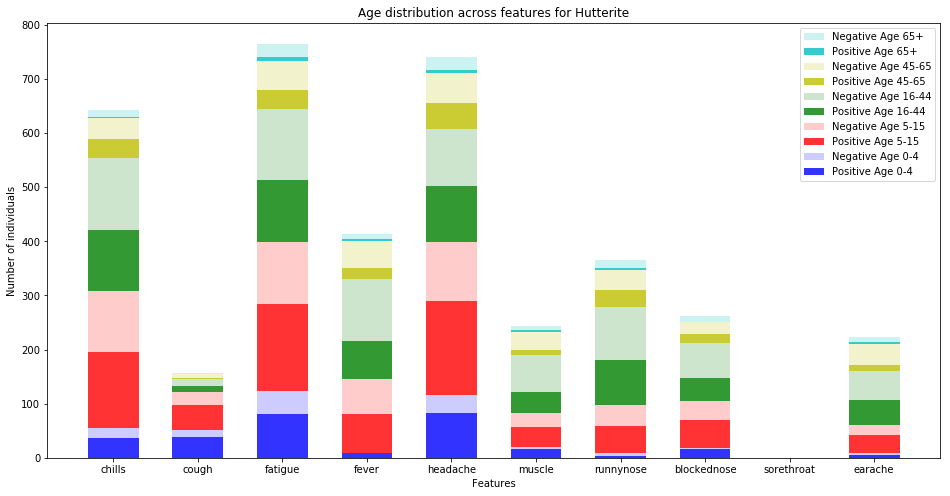

In [35]:
plot_age_across_features(np.asarray(list(age_1_ht.values()),dtype=int),
                         np.asarray(list(age_2_ht.values()),dtype=int),
                         np.asarray(list(age_3_ht.values()),dtype=int),
                         np.asarray(list(age_4_ht.values()),dtype=int),
                         np.asarray(list(age_5_ht.values()),dtype=int),
                         np.asarray(list(age_positive_1_ht.values()),dtype=int),
                         np.asarray(list(age_positive_2_ht.values()),dtype=int),
                         np.asarray(list(age_positive_3_ht.values()),dtype=int),
                         np.asarray(list(age_positive_4_ht.values()),dtype=int),
                         np.asarray(list(age_positive_5_ht.values()),dtype=int),
                         symptoms['Hutterite'],
                         "Age distribution across features for Hutterite")

### Gender demographics

In [36]:
#Plot gender distribution
def plot_gd_across_features(male_distribution,
                            female_distribution,
                            positive_male_distribution,
                            positive_female_distribution,
                            labels,
                            title):
    plt.figure(figsize=(16,8))
    
    ind = np.array([x for x,_ in enumerate(labels)])
    width = 0.6
    opacity = 0.2
    plt.bar(ind,
            male_distribution-positive_male_distribution,
            width,
            alpha = opacity,
            label='Negative Male',
            color = 'y',
            bottom=female_distribution+positive_male_distribution)
    
    plt.bar(ind ,
            positive_male_distribution,
            width,
            alpha = 0.8,
            label = 'Positive Male',
            color = 'y',
            bottom = female_distribution)
    
    plt.bar(ind,
            female_distribution-positive_female_distribution,
            width,
            alpha = opacity,
            label='Negative Female',
            color='b',
            bottom = positive_female_distribution)
    
    plt.bar(ind,
            positive_female_distribution,
            width,
            alpha = 0.8,
            label = 'Positive Female',
            color = 'b')
    
    plt.xticks(ind,labels)
    plt.ylabel('Number of individuals')
    plt.xlabel('Features')
    plt.legend(loc="upper right")
    plt.title(title)
    plt.show()

In [37]:
def gender_distribution_across_features(dataset,symptoms,target,title):
    
    male_distribution = defaultdict()
    female_distribution = defaultdict()
    positive_male_distribution = defaultdict()
    positive_female_distribution = defaultdict()
    for i in symptoms:
        #male distribution
        
        male_feature = dataset.loc[(dataset[i] == 1) & (dataset['male'] == 1)]
        male_distribution[i] = male_feature.shape[0]
        
        #female distribution
        female_feature = dataset.loc[(dataset[i] == 1) & (dataset['female'] == 1)]
        female_distribution[i] = female_feature.shape[0]
        
        #positive cases male distribution
        positive_male_feature = dataset.loc[(dataset[i] == 1) & (dataset['male'] == 1) & (dataset[target] == 1)]
        positive_male_distribution[i] = positive_male_feature.shape[0]
        
        #positive cases female distribution
        positive_female_feature = dataset.loc[(dataset[i] == 1) & (dataset['female'] == 1) & (dataset[target] ==1)]
        positive_female_distribution[i] = positive_female_feature.shape[0]
    
    plot_gd_across_features(np.array(list(male_distribution.values())),
                            np.array(list(female_distribution.values())),
                            np.array(list(positive_male_distribution.values())),
                            np.array(list(positive_female_distribution.values())),
                            symptoms,
                            'Gender distribution across features for '+title)

    return male_distribution,female_distribution,positive_male_distribution,positive_female_distribution
    

### Gender distribution for NYUMC

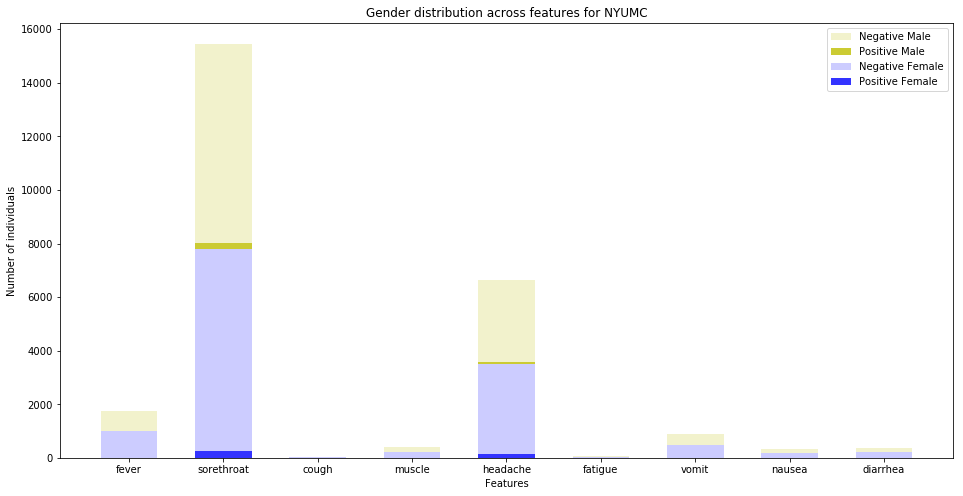

In [38]:
m_nyumc,f_nyumc,pm_nyumc,pf_nyumc = gender_distribution_across_features(data_nyumc,
                                                                        symptoms['NYUMC'],
                                                                        target_variable['NYUMC'],
                                                                        "NYUMC")

### Gender distribution for GoViral

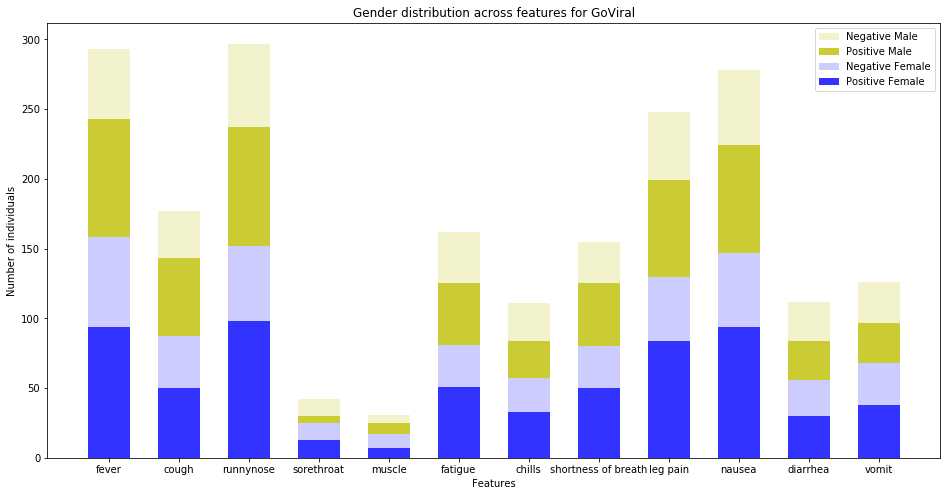

In [39]:
m_gv,f_gv,pm_gv,pf_gv = gender_distribution_across_features(data_gv,
                                                symptoms['GoViral'],
                                                target_variable['GoViral'],
                                                "GoViral")

### Gender distribution for FluWatch

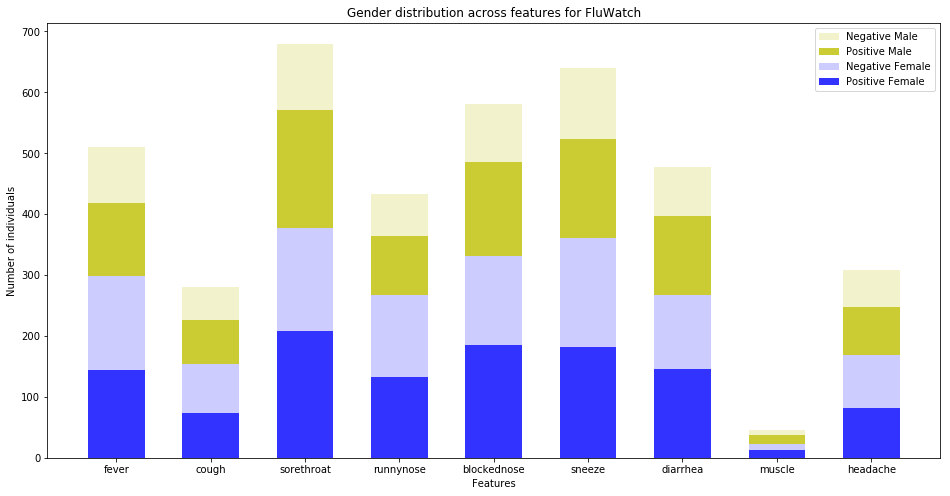

In [40]:
m_fw,f_fw,pm_fw,pf_fw = gender_distribution_across_features(data_fw,
                                                symptoms['FluWatch'],
                                                target_variable['FluWatch'],
                                                "FluWatch")

### Gender Distribution across HongKong

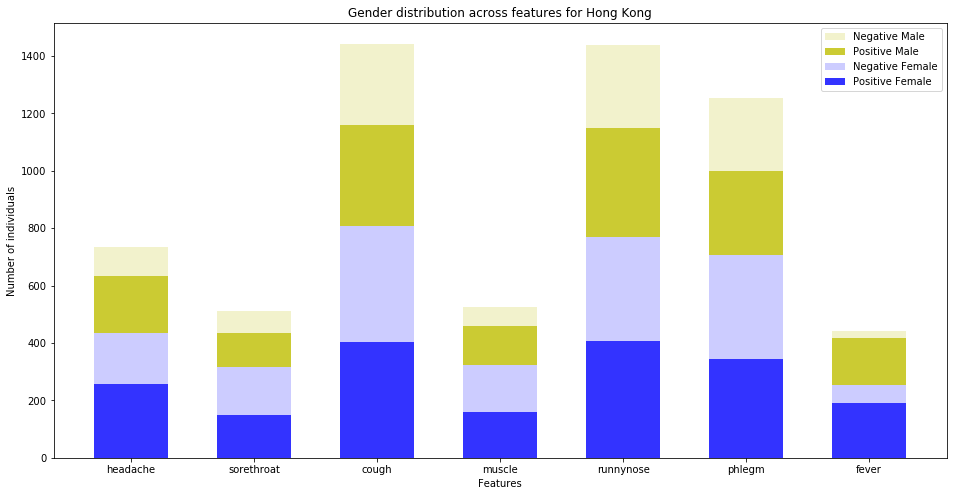

In [41]:
m_hk,f_hk,pm_hk,pf_hk = gender_distribution_across_features(data_hk,
                                                symptoms['HongKong'],
                                                target_variable['HongKong'],
                                                "Hong Kong")

### Gender distribution for Hutterite

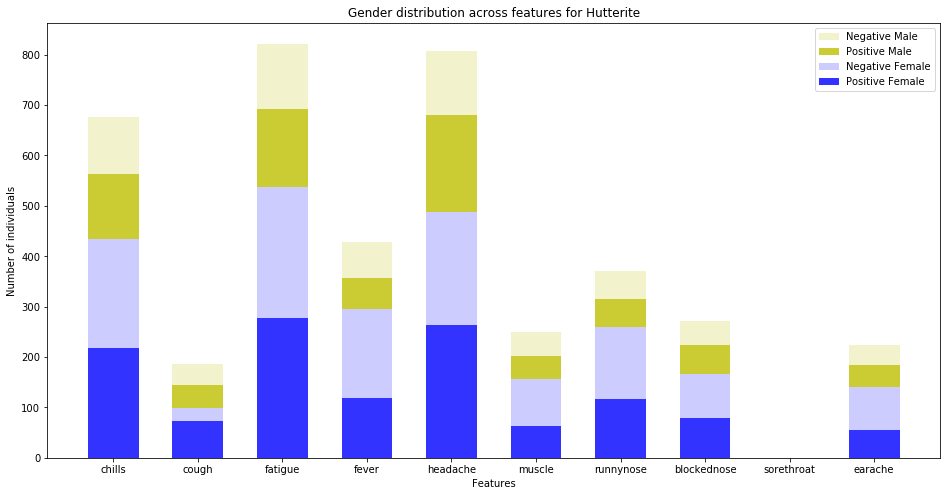

In [42]:
m_ht,f_ht,pm_ht,pf_ht = gender_distribution_across_features(data_ht,
                                                symptoms['Hutterite'],
                                                target_variable['Hutterite'],
                                                "Hutterite")